<a href="https://colab.research.google.com/github/rikharigaurav/FSDL/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch is library used to simplify deep learning

it provides designed modules and classes to create nueral network, optimization, Datasets and Dataloaders



# what is torch.nn



to answer this question we will use MNIST datset .
this datset consists of black and white images of hand-written digits

In [ ]:
from pathlib import Path
import requests


def download_mnist(path):
    url = "https://github.com/pytorch/tutorials/raw/main/_static/"
    filename = "mnist.pkl.gz"

    if not (path / filename).exists():
        content = requests.get(url + filename).content
        (path / filename).open("wb").write(content)

    return path / filename


data_path = Path("data") if Path("data").exists() else Path("../data")
path = data_path / "downloaded" / "vector-mnist"
path.mkdir(parents=True, exist_ok=True)

datafile = download_mnist(path)

In [ ]:
import gzip
import pickle

def read_mnist(path):
  with gzip.open(path, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
  return x_train, y_train, x_valid, y_valid

x_train, y_trian, x_valid, y_valid = read_mnist(datafile)

Since each image is 28 X 28. so we need to flatten it so the number of rows = 784(28X28)

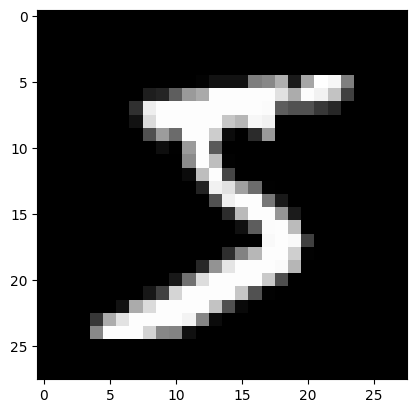

(50000, 784)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape((28, 28)), cmap = "gray")

plt.show()
print(x_trian.shape)

Neural net from scratch (without torch.nn)

**STEP 1:** we will initialize the weights and biases. Here we are using the Xavier initialization

**Xavier initialization:** multipying with (1/sqrt(n))

In [ ]:
import math
import torch

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

**Step 2:** Create an activation function

Activation Function is used to prevent linearity in the prediction. otherwise the nodes will act as an linear function

In [ ]:
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
  return log_softmax(xb @ weights + bias) # @ helps in matrix multiplication

Here we are doing FORWARD PASS (forward pass is nothing but just predicting the output).

**Note** Right now the prediction won't be better. They will we just random prediction due to random values of weights and bias.



but at

In [ ]:
batch_size = 32

xb = x_train[0:batch_size]  # This creates a mini-batch from the x_train
preds = model(torch.from_numpy(xb))    # Prediction

# torch.from_numpy help to convert numpy array to tensor to support matrix multiplication

preds[0], preds.shape
print(preds[0], preds.shape)


Let's implement -ve log-likelihood to use as the loss function

In [ ]:
def nll(input, target):
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

# Setup


In [ ]:
lab_idx = 1

if "bootstrap" not in locals() or bootstrap.run:
    # path management for Python
    pythonpath, = !echo $PYTHONPATH
    if "." not in pythonpath.split(":"):
        pythonpath = ".:" + pythonpath
        %env PYTHONPATH={pythonpath}
        !echo $PYTHONPATH

    # get both Colab and local notebooks into the same state
    !wget --quiet https://fsdl.me/gist-bootstrap -O bootstrap.py
    import bootstrap

    # change into the lab directory
    bootstrap.change_to_lab_dir(lab_idx=lab_idx)

    # allow "hot-reloading" of modules
    %load_ext autoreload
    %autoreload 2
    # needed for inline plots in some contexts
    %matplotlib inline

    bootstrap.run = False  # change to True re-run setup

!pwd
%ls

env: PYTHONPATH=.:/env/python
.:/env/python
/content/fsdl-text-recognizer-2022-labs/lab01
notebooks/  text_recognizer/


# Getting data and making tensors

In [ ]:
from pathlib import Path
import requests


def download_mnist(path):
    url = "https://github.com/pytorch/tutorials/raw/main/_static/"
    filename = "mnist.pkl.gz"

    if not (path / filename).exists():
        content = requests.get(url + filename).content
        (path / filename).open("wb").write(content)

    return path / filename


data_path = Path("data") if Path("data").exists() else Path("../data")
path = data_path / "downloaded" / "vector-mnist"
path.mkdir(parents=True, exist_ok=True)

datafile = download_mnist(path)

The data used above is generally too large to be stored on a disk.

so fetching data over a network is a common first step in model training

The dataset above is too large which can require more resource to read, write and sending over the network - so the datasets is compressed (.gz extension)



In [ ]:
import gzip
import pickle

def read_mnist(path):
  with gzip.open(path, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
  return x_train, y_train, x_valid, y_valid

x_train, y_trian, x_valid, y_valid = read_mnist(datafile)

torch.tensor helps us to convert our array into tensor

Tensor: Tensor in ML is just like an n-dimension array

In [ ]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [ ]:
print(x_train, y_train, sep="\n")

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 0, 4,  ..., 8, 4, 8])


Accessing the content of Tensor is called "indexing"

In [ ]:
y_train[0], x_train[0, ::2]

(tensor(5),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0117, 0.0703, 0.4922, 0.6836, 0.6484,
         0.9648, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1172, 0.3672,
         0.6641, 0.9883, 0.9883, 0.8789, 0.9883, 0.7617, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.9297, 0.9883, 0.9883, 0.9883, 0.9883, 0.3633,
         0.3203,

In [ ]:
# .ndim provide the dimension of the following tensor

x_train.ndim, y_train.ndim

(2, 1)

In [ ]:
x_train[0, 0], y_train[0]

(tensor(0.), tensor(5))

In [ ]:
n, c = x_train.shape
print(x_train.shape)
print(y_train.shape)

torch.Size([50000, 784])
torch.Size([50000])


The Tensors inside of the x_train Tensor aren't just any old blocks of numbers: they're images of handwritten digits. The y_train Tensor contains the identities of those digits.

In [ ]:
# re-execute this cell for more samples
import random

import wandb  # just for some convenience methods that convert tensors to human-friendly datatypes

import text_recognizer.metadata.mnist as metadata # metadata module holds metadata separate from data

idx = random.randint(0, len(x_train))
example = x_train[idx]

print(y_train[idx])  # the label of the image
wandb.Image(example.reshape(*metadata.DIMS)).image  # the image itself

tensor(2)


# Building a DNN using only torch.Tensor methods and Python

## Defining the model


## Defining the loss and metrics

## Defining and running the fitting loop